### Packages and Data Import:

In [1]:
import pandas as pd
import numpy as np

In [2]:
qlcm_df=pd.read_excel("indiaall.xlsx",sheet_name='indiaall_copy')


In [3]:
indiadata_total=qlcm_df

In [4]:
indiadata_total.shape

(66777, 13)

In [5]:
import re
from nltk import RegexpParser
from gensim import models
import nltk
import os
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import heapq
from operator import itemgetter
## Importing alsl the required packages
import nltk
import gensim
import pandas as pd
import string
import random
from nltk.corpus import subjectivity,stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords 
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import extract_unigram_feats, mark_negation
import logging
#import pyLDAvis.gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
print ("hello")

hello


### Text-Preprocessing 1/2:Stopwords Removal,Tokenizaion:

In [6]:
import nltk
from nltk.corpus import stopwords

# Removal of stopwords
stop_words = stopwords.words('english')
newStopWords = ['lol','LOL','samsung','sony','galaxy','said','this','year','please','know','find','look','back','today','also','read',\
                 'reading','want','much','emi','nocost',\
                 'address','every','news','article','feel','call','auto','think','going','cancel','rate','month','called',\
                 'recieved','offered','able','new','make','save','saved','article','really','need','offer','change','even','paper',\
                 'page','take','feel','right','many','thing','comment','section',\
                'articles','full','todays','latest','share','comments','last','night','months','several','centre','times',\
                 'answer','question','questions','told','anymore','towards',\
                 'feels','require','chosen','yesterday','today','ready','Verified','Purchase','Color','Size:','Style','verified','purchase','color','size','style','Colour','i','s','t','n','p',\
               'br','the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours','oh', 'ourselves','you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him','-','lg','g','his', 'himself','nokia','honor', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',"that's",\
            'theirs', 'themselves','would',"i've",'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be',"i'm",'been', 'being', 'have', 'has', 'had', 'having', 'do','does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',"p's", \
            'at', 'by', 'for', 'with', 'about', 'etc','between', 'into', 'through', 'during', 'before','after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', \
            'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very',"'s",'oh','iphone', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",'colour', 'now', 'd','gb', 'll', 'm', 'o', 're', \
            'y', 'ain', 'aren', 'hadn',\
            'hasn','haven','isn', 'ma', 'mightn', 'mustn',\
            'needn','shan', "shan't", 'shouldn','wasn','weren', \
            'won', 'I', 'wouldn','Verified','Purchase','Color','Size:','Style','verified','purchase','color','size','style','Colour','i','s','t','n','p'
              'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']



stop_words.extend(newStopWords)
stopadd=['no','not']
stop_words.remove('no')
stop_words.remove('not')
stop_words_final=set(stop_words)

def stopword_removal(match): 
    filtered_sentence = []
    word_tokens = word_tokenize(match)
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence) 

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower() 
        docs[idx] = stopword_removal(docs[idx])
        docs[idx] = tokenizer.tokenize(docs[idx])  
  
    return docs


### Text Preprocessing 2/2: Pattern Matching and Text-Cleaning:

In [7]:
def text_cleanup(match):
    match=re.sub("Colour: [\w\s]*\|",'',match)
    match=re.sub("Color: [\w\s]*\|",'',match)
    match=re.sub("Style: [\w\s]*\|",'',match)
    match=re.sub("Size: [\w\s]*\|",'',match)
    match=match.lower()
    match=match.replace("won't",'will not')
    match=match.replace("shouldn't",'should not')
    match=match.replace("aren't",'are not')
    match=match.replace("couldn't",'could not')
    match=match.replace("doesn't",'does not')
    match=match.replace(r"isn't", "is not")
    match=match.replace(r"weren't", "were not")
    match=match.replace(r"hasn't", "has not")
    match=match.replace(r"hadn't", "had not")
    match=''.join([i for i in match if not i.isdigit()])
    #Remove additional white spaces
    match = re.sub('[\s]+', ' ', match)
    # Remove '.' in between a sentence
    match = re.sub('\s[\\.]\s', ' ', match)
    #remove individual characters
    shortword = re.compile(r'\W*\b\w{1}\b')
    match=shortword.sub('', match)
    match = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',match)
    #Remove additional white spaces
    match = re.sub('[\s]+', ' ', match)
    #trim
    match = match.strip('\'"')
    # Remove 'Renewal Email + one word only'
    match=re.sub( '^Renewal Email\s?[A-z]+',"",match)
    match = re.sub('[-=/!%@#$;():~]', '', match)
    match = re.sub('[\s]+', ' ', match)
    #trim
    match = match.strip('\'"')
    match=stopword_removal(match)
    match = re.sub('[^A-Za-z0-9]+',' ',match)
    return match

### Pre-Processed Text Data:

In [8]:
qlcm_df['Review_cleaned']=qlcm_df['Review_Text'].astype(str)
qlcm_df['Review_cleaned1']=list(map(lambda x: text_cleanup(x),qlcm_df['Review_cleaned']))
qlcm_df['Review_cleaned2'] = list(map(lambda x: text_cleanup(x),qlcm_df['Review_cleaned1']))


In [10]:
################################################################################################

In [11]:
addn_df=pd.read_excel("Nokia_UKAmazon_Additional.xlsx")

In [12]:
addn_df['Review_cleaned']=addn_df['Review'].astype(str)
addn_df['Review_cleaned1']=list(map(lambda x: text_cleanup(x),addn_df['Review_cleaned']))
addn_df['Review_cleaned2'] = list(map(lambda x: text_cleanup(x),addn_df['Review_cleaned1']))

In [ ]:
###################################################################################################

### Topic Modelling:

In [9]:
# Convert to array
docs = array(qlcm_df['Review_cleaned2'])

# Perform function on our document
docs = docs_preprocessor(docs)
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a trigram, add to document.
            docs[idx].append(token)

dictionary = Dictionary(docs)

dictionary.filter_extremes(no_below=3, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:2])
print(dictionary)

Number of unique tokens: 8612
Number of documents: 66777
[[(0, 1)], [(1, 1), (2, 1), (3, 3), (4, 1)]]
Dictionary(8612 unique tokens: ['nice', 'frequently', 'hangs', 'hangs_frequently', 'not']...)


### Computation of Coherence Values for Topic Model validation:

In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [2]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=1, limit=20, step=1)


#### Topic Model/LDA Model output:

In [16]:
lda_model=model_list[5]
# Print the Keyword in the 6 topics
print(lda_model.print_topics())

[(0, '0.048*"battery_life" + 0.021*"price" + 0.016*"life" + 0.011*"quality" + 0.011*"not" + 0.009*"android" + 0.009*"well" + 0.009*"bought" + 0.008*"one" + 0.008*"nice"'), (1, '0.023*"battery_lasts" + 0.017*"android" + 0.017*"battery_life" + 0.016*"value_money" + 0.016*"one" + 0.014*"stock_android" + 0.014*"fast" + 0.013*"not" + 0.011*"excellent" + 0.009*"best"'), (2, '0.016*"one" + 0.014*"money" + 0.013*"battery_life" + 0.012*"great_value" + 0.012*"big_screen" + 0.012*"quality" + 0.011*"price" + 0.011*"value" + 0.010*"nice" + 0.010*"love"'), (3, '0.025*"battery_life" + 0.022*"not" + 0.013*"use" + 0.009*"android" + 0.009*"life" + 0.008*"well" + 0.007*"better" + 0.007*"no" + 0.007*"like" + 0.006*"one"'), (4, '0.059*"battery_life" + 0.043*"highly_recommend" + 0.035*"easy_use" + 0.023*"recommend" + 0.021*"easy" + 0.020*"use" + 0.019*"life" + 0.013*"highly" + 0.010*"price" + 0.010*"everything"'), (5, '0.030*"battery_life" + 0.017*"mid_range" + 0.014*"no" + 0.011*"life" + 0.010*"lots_featur

In [17]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.28257278963096066


#### Topic Modelling Visualization:

In [19]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model,corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.026672  0.016676       1        1  33.367016
0      0.004364 -0.003809       2        1  20.397886
2      0.000656 -0.077668       3        1  14.854937
1      0.070853 -0.065497       4        1  11.086391
4     -0.151993  0.010820       5        1  10.607858
5      0.049448  0.119478       6        1   9.685906, topic_info=     Category         Freq                  Term        Total  loglift  \
term                                                                     
1116  Default   450.000000      highly_recommend   450.000000  30.0000   
40    Default  2796.000000          battery_life  2796.000000  29.0000   
122   Default   448.000000              easy_use   448.000000  28.0000   
932   Default   331.000000         battery_lasts   331.000000  27.0000   
17    Default   409.000000             recommend   409.000000  26.0000   
121   Default   457.000000                  easy   457.000000  25.0000   
1381  Default   162.000000             mid_range   162.000000  24.0000   
1099  Default   265.000000           value_money   265.000000  23.0000   
826   Default   174.000000            big_screen   174.000000  22.0000   
178   Default   243.000000         stock_android   243.000000  21.0000   
1115  Default   198.000000                highly   198.000000  20.0000   
77    Default   852.000000                   use   852.000000  19.0000   
99    Default   846.000000                 price   846.000000  18.0000   
44    Default   958.000000                  life   958.000000  17.0000   
958   Default   432.000000                 money   432.000000  16.0000   
474   Default   313.000000                 value   313.000000  15.0000   
2973  Default   188.000000             weeks_ago   188.000000  14.0000   
466   Default   271.000000           great_value   271.000000  13.0000   
31    Default   829.000000                   one   829.000000  12.0000   
2865  Default   102.000000         lots_features   102.000000  11.0000   
1071  Default   134.000000      definitely_worth   134.000000  10.0000   
1161  Default   160.000000          high_quality   160.000000   9.0000   
1351  Default   113.000000      recommend_anyone   113.000000   8.0000   
2418  Default    91.000000           worth_penny    91.000000   7.0000   
970   Default   166.000000           worth_money   166.000000   6.0000   
213   Default   634.000000                    no   634.000000   5.0000   
4     Default   135.000000  definitely_recommend   135.000000   4.0000   
107   Default   808.000000               android   808.000000   3.0000   
1960  Default   139.000000              easy_set   139.000000   2.0000   
288   Default   197.000000         build_quality   197.000000   1.0000   
...       ...          ...                   ...          ...      ...   
1597   Topic6    22.767784                 known    33.891602   1.9367   
457    Topic6    62.392742             no_issues   103.689621   1.8265   
186    Topic6    72.470192                   way   140.418640   1.6730   
15     Topic6    35.170528              problems    58.886009   1.8191   
593    Topic6    55.306408                   yet   112.163559   1.6274   
1087   Topic6    40.367199               connect    82.420242   1.6207   
191    Topic6    61.388256                around   174.273087   1.2911   
213    Topic6   122.557938                    no   634.073120   0.6909   
40     Topic6   258.681519          battery_life  2796.446289  -0.0460   
444    Topic6    81.387764                  best   438.217560   0.6510   
442    Topic6    58.374069                 years   226.639847   0.9780   
29     Topic6    71.344032                  love   399.017609   0.6130   
20     Topic6    39.746109                 touch   100.751419   1.4044   
44     Topic6    92.048119                  life   958.319336  -0.0084   
350    Topic6    35.023510                no_la

### Unsupervised Sentiment Analysis: 

#### Creating Data-Format For Unsupervised Modelling:

In [ ]:
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = 15000)])

df_word_topic = pd.DataFrame(top_words_per_topic, columns = ['Topic', 'Word', 'P'])

In [32]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tuhin.majumder\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
from nltk.sentiment import vader
from nltk.sentiment.util import *
from nltk import tokenize

sid = vader.SentimentIntensityAnalyzer()

In [34]:
# Adding Topics and sentiments to the dataframe
for i in range(len(set(df_word_topic.Topic))):
    qlcm_df['Topic_'+str(i)]=" "
    qlcm_df['Sentiment_Score_Topic_'+str(i)]=" "
   

In [37]:
for j in range(len(qlcm_df['Review_cleaned2'])):
# for j in progressbar.progressbar(range(50)):
    txt=qlcm_df.Review_cleaned2[j]
    df_word_topic_sub=df_word_topic[df_word_topic['Word'].isin(docs[j])]
    if len(df_word_topic_sub.Topic)>0:
        idx = df_word_topic_sub.groupby(['Topic'])['P'].transform(max) == df_word_topic_sub['P']
        df_word_topic_sub=df_word_topic_sub[idx].reset_index()
        r=0
        for t in set(df_word_topic_sub['Topic']):
            qlcm_df['Topic_'+str(t)][j]= re.sub("_"," ",df_word_topic_sub['Word'][r])
            tagged_sent=[sentence + '.' for sentence in txt.split('.') if qlcm_df['Topic_'+str(t)][j] in sentence.lower()]
            tagged_sent.append(txt)
            qlcm_df['Sentiment_Score_Topic_'+str(t)][j]=sid.polarity_scores(tagged_sent[0])['compound']
            r += 1

### Supervised Sentiment Analysis:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Importing the sample data:

In [6]:
sample_nw=pd.read_excel("indiaall_Sample_3916 (2).xlsx")

In [13]:
sample_nw

,ID,Unnamed: 1,Id1,URL,URL1,Brand,Model,Category,Review_Text,Rating,...,Year,Month and Year,Total Count,Camera,Display,Battery,Performance,Value for Money,Fingerprint,Gaming
0,1,10868,10869,https://www.flipkart.com/samsung-galaxy-a50-bl...,Flipkart,Samsung,Galaxy A50,Budget,Very nice product thank you Flipkart and Samsung,5.0,...,2019,April2019,957,0,0,0,0,0,0,0
1,2,40021,40022,https://www.amazon.in/Honor-Blue-6GB-128GB-Sto...,Amazon,Huawei,"Honor 8X (Blue, 6GB RAM, 128GB Storage)",Budget,Colour: Blue|Size: 4GB+64GB|Verified Purchase....,5.0,...,2019,February2019,10733,0,0,0,0,0,0,0
2,3,22790,22791,https://www.flipkart.com/infinix-hot-s3x-milan...,Flipkart,Infinix,Hot S3X,Basic,Product not good. Software problem. No replaced,NaN,...,2019,April2019,1721,0,0,0,0,0,0,0
3,4,33095,33096,https://www.amazon.in/A3s-Purple-Storage-Addit...,Amazon,Oppo,"OPPO A3s (Dark Purple, 3GB RAM, 32GB Storage) ...",Basic,Colour: Dark Purple|Size: 32GB|Style: with No ...,4.0,...,2019,February2019,1152,0,0,0,0,0,0,0
4,5,48467,48468,https://www.amazon.in/Honor-Play-Navy-Blue-Sto...,Amazon,Huawei,"Honor Play (Navy Blue, 4GB RAM, 64GB Storage)",Budget,Colour: Navy Blue|Size: 64GB Storage|Style: 4G...,5.0,...,2019,March2019,7537,0,0,0,0,1,0,0
5,6,19566,19567,https://www.flipkart.com/oppo-f9-mist-black-64...,Flipkart,Oppo,F9,Budget,happy to brought this phone in discount,4.0,...,2019,January2019,3979,0,0,0,0,0,0,0
6,7,52908,52909,https://www.amazon.in/Samsung-Galaxy-M30-Grada...,Amazon,Samsung,"Samsung Galaxy M30 (Gradation Black, 4+64 GB)",Budget,Verified Purchase.\nNice product....camera is ...,5.0,...,2019,April2019,1309,1,0,0,0,0,0,0
7,8,10207,10208,https://www.flipkart.com/nokia-6-1-plus-black-...,Flipkart,Nokia,Nokia 6.1 Plus,Budget,my device is hitted to much while playing vide...,NaN,...,2018,October2018,20323,0,0,0,0,0,0,0
8,9,61296,61297,https://www.flipkart.com/nokia-5-1-plus-black-...,Flipkart,Nokia,Nokia5.1Plus,Basic,Worth every pennyIT IS VERY GOOD PHONE AND I L...,5.0,...,2019,February2019,NaN,1,1,0,0,1,0,0
9,10,5556,5557,https://www.flipkart.com/nokia-6-1-plus-black-...,Flipkart,Nokia,Nokia 6.1 Plus,Budget,Guys plz dont buy this nokia 6.1plus phones at...,NaN,...,2018,December2018,20323,0,0,-1,-1,0,0,0


### Finding the Out of sample data:

In [15]:
sample_nwlst=list(sample_nw['Id1'])
indialst=list(indiadata_total['Id1'])
xc=[i for i in indialst if i not in sample_nwlst]
indiadata_oosample1=indiadata_total[indiadata_total["Id1"].isin(xc)]

In [14]:
indiadata_oosample1=pd.read_excel('IndiaOutofSampleData_62861.xlsx')

In [15]:
indiadata_oosample1.shape

(62861, 16)

In [7]:
sample_nw['Review_cleaned']=sample_nw['Review_Text'].astype(str)
sample_nw['Review_cleaned1']=list(map(lambda x: text_cleanup(x),sample_nw['Review_cleaned']))
sample_nw['Review_cleaned2'] = list(map(lambda x: text_cleanup(x),sample_nw['Review_cleaned1']))

In [10]:
sample_nw.to_excel('sampleData_3916_v1.xlsx')

In [18]:
indiadata_oosample1['Review_cleaned']=indiadata_oosample1['Review_Text'].astype(str)
indiadata_oosample1['Review_cleaned1']=list(map(lambda x: text_cleanup(x),indiadata_oosample1['Review_cleaned']))
indiadata_oosample1['Review_cleaned2'] = list(map(lambda x: text_cleanup(x),indiadata_oosample1['Review_cleaned1']))

## Modelling (Random Forest):

In [19]:
def prediction_1000(col):
    X_train, X_test, Y_train, Y_test = train_test_split(sample_nw['Review_cleaned2'],sample_nw[col],test_size = 0.2, random_state = 21)
    Xtestdata=indiadata_oosample1['Review_cleaned2']
    tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))#Uni-grams and Bi-grams
    final_tfidf_train = tf_idf_vect.fit_transform((X_train.fillna('abc')).values)
    final_tfidf_test = tf_idf_vect.transform(X_test.values)
    tfidf_testdata=tf_idf_vect.transform(Xtestdata.fillna('Test'))
    lst1=list(range(1,30))
    estimators1=[i for i in lst1]
    cv_scores1=[]
    for k in estimators1:
        
        rf= RandomForestClassifier(n_estimators=k)
        rf.fit(final_tfidf_train,Y_train)   
        acc1 = cross_val_score(rf,final_tfidf_train,Y_train,scoring='accuracy')*100
        cv_scores1.append(acc1) 
    lstscore1=[]
    for i in range(len(lst1)):
        lstscore1.append((np.mean(cv_scores1[i])))
    scores_lst1=list(lstscore1)
    optimal_k = estimators1[scores_lst1.index(max(scores_lst1))]
    rf3= RandomForestClassifier(n_estimators=optimal_k)
    rf3.fit(final_tfidf_train,Y_train)
    pred3=rf3.predict(final_tfidf_test)
    acc3 = accuracy_score(Y_test, pred3) * 100
    pred4= rf3.predict(tfidf_testdata)
    return acc3,pred3,rf3,pred4

### Prediction on Topic-level :

In [21]:
pred_display=prediction_1000('Display')[3]
pred_batterylife=prediction_1000('Battery')[3]
pred_performance=prediction_1000('Performance')[3]
pred_valueforMoney=prediction_1000('Value for Money')[3]
pred_fingerprint=prediction_1000('Fingerprint')[3]
pred_camera=prediction_1000('Camera')[3]
pred_gaming=prediction_1000('Gaming')[3]

In [22]:
indiadata_oosample1['Camera']=pred_camera
indiadata_oosample1['Display']=pred_display
indiadata_oosample1['Batterylife']=pred_batterylife
indiadata_oosample1['Performance']=pred_performance
indiadata_oosample1['ValueforMoney']=pred_valueforMoney
indiadata_oosample1['Fingerprint']=pred_fingerprint
indiadata_oosample1['Gaming']=pred_gaming

### Accuracy on Topic-level :

In [25]:
acc_display=prediction_1000('Display')[0]
acc_batterylife=prediction_1000('Battery')[0]
acc_performance=prediction_1000('Performance')[0]
acc_valueforMoney=prediction_1000('Value for Money')[0]
acc_fingerprint=prediction_1000('Fingerprint')[0]
acc_camera=prediction_1000('Camera')[0]
acc_gaming=prediction_1000('Gaming')[0]

In [26]:
print("Accuracy values on Camera,Display, Batterylife, Performance,ValueforMoney,Fingerprint,Camera,Gaming are:\n\n" ,acc_camera,',',acc_display,',',acc_batterylife,',',acc_performance,',',acc_valueforMoney,',',acc_fingerprint,',',acc_gaming)

Accuracy values on Camera,Display, Batterylife, Performance,ValueforMoney,Fingerprint,Camera,Gaming are:

 87.88265306122449 , 93.87755102040816 , 90.3061224489796 , 91.45408163265306 , 90.3061224489796 , 97.95918367346938 , 97.83163265306123


### Topic-level Predictions Formulated on Datasheet  :

In [621]:
#ukdata_oosample1.to_excel('Prediction_RF_1000.xlsx')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Modelling (Logistic Regression):

In [32]:
def prediction_logisticreg(col):
    X_train, X_test, Y_train, Y_test = train_test_split(sample_nw['Review_cleaned2'],sample_nw[col],test_size = 0.2, random_state = 21)
    Xtestdata=indiadata_oosample1['Review_cleaned2']
    tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))#Uni-grams and Bi-grams
    final_tfidf_train = tf_idf_vect.fit_transform((X_train.fillna('abc')).values)
    final_tfidf_test = tf_idf_vect.transform(X_test.values)
    tfidf_testdata=tf_idf_vect.transform(Xtestdata.fillna('Test'))
    log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}
    grid_log_reg = GridSearchCV(LogisticRegression(multi_class='ovr'), log_reg_params)
    grid_log_reg.fit(final_tfidf_train, Y_train)
    # We automatically get the logistic regression with the best parameters.
    log_reg = grid_log_reg.best_estimator_
    #rf3= RandomForestClassifier(n_estimators=optimal_k)
    log_reg.fit(final_tfidf_train,Y_train)
    pred3=log_reg.predict(final_tfidf_test)
    acc3 = accuracy_score(Y_test, pred3) * 100
    pred4= log_reg.predict(tfidf_testdata)
    return acc3,pred3,log_reg,pred4

In [33]:
acc1_display=prediction_logisticreg('Display')[0]
#'Batterylife','Display', 'Camera', 'Performance', 'ValueforMoney', 'Fingerprint'
acc1_batterylife=prediction_logisticreg('Battery')[0]
acc1_performance=prediction_logisticreg('Performance')[0]
acc1_valueforMoney=prediction_logisticreg('Value for Money')[0]
acc1_fingerprint=prediction_logisticreg('Fingerprint')[0]
acc1_camera=prediction_logisticreg('Camera')[0]
acc1_gaming=prediction_logisticreg('Gaming')[0]

In [34]:
print("Accuracy values on Camera,Display, Batterylife, Performance,ValueforMoney,Fingerprint,Camera,Gaming are:\n\n" ,acc1_camera,',',acc1_display,',',acc1_batterylife,',',acc1_performance,',',acc1_valueforMoney,',',acc1_fingerprint,',',acc1_gaming)

Accuracy values on Camera,Display, Batterylife, Performance,ValueforMoney,Fingerprint,Camera,Gaming are:

 91.83673469387756 , 95.53571428571429 , 93.49489795918367 , 93.49489795918367 , 89.15816326530613 , 98.21428571428571 , 98.5969387755102


### Predictions on Topic-level :

In [36]:
pred1_display=prediction_logisticreg('Display')[3]
pred1_batterylife=prediction_logisticreg('Battery')[3]
pred1_performance=prediction_logisticreg('Performance')[3]
pred1_valueforMoney=prediction_logisticreg('Value for Money')[3]
pred1_fingerprint=prediction_logisticreg('Fingerprint')[3]
pred1_camera=prediction_logisticreg('Camera')[3]
pred1_gaming=prediction_logisticreg('Gaming')[3]

In [40]:
indiadata_oosample1['Camera_logreg']=pred1_camera
indiadata_oosample1['Display_logreg']=pred1_display
indiadata_oosample1['Battery_logreg']=pred1_batterylife
indiadata_oosample1['Performance_logreg']=pred1_performance
indiadata_oosample1['ValueforMoney_logreg']=pred1_valueforMoney
indiadata_oosample1['Fingerprint_logreg']=pred1_fingerprint
indiadata_oosample1['Gaming_logreg']=pred1_camera

In [41]:
from prettytable import PrettyTable
x=PrettyTable()
column_names = ["Topics","Accuracy on Random Forest Model", "Accuracy on Logistic Regression Model"]
x.add_column(column_names[0],['Camera','Display', 'Batterylife', 'Performance','ValueforMoney','Fingerprint','Gaming'])
x.add_column(column_names[1],[acc_camera,acc_display,acc_batterylife,acc_performance,acc_valueforMoney,acc_fingerprint,acc1_gaming])
x.add_column(column_names[2],[acc1_camera,acc1_display,acc1_batterylife,acc1_performance,acc1_valueforMoney,acc1_fingerprint,acc1_gaming])
#y.add_column()

#### Model Comparison:

In [42]:
print("The Accuracy values in Tablular Format:\n", x)

The Accuracy values in Tablular Format:
 +---------------+---------------------------------+---------------------------------------+
|     Topics    | Accuracy on Random Forest Model | Accuracy on Logistic Regression Model |
+---------------+---------------------------------+---------------------------------------+
|     Camera    |        87.88265306122449        |           91.83673469387756           |
|    Display    |        93.87755102040816        |           95.53571428571429           |
|  Batterylife  |         90.3061224489796        |           93.49489795918367           |
|  Performance  |        91.45408163265306        |           93.49489795918367           |
| ValueforMoney |         90.3061224489796        |           89.15816326530613           |
|  Fingerprint  |        97.95918367346938        |           98.21428571428571           |
|     Gaming    |         98.5969387755102        |            98.5969387755102           |
+---------------+----------------------

### Conclusion: For all the 6 topics the accuracy values came higher for Logistic Regression Model,hence we used this model for Predictions on Out of sampleTest data.

In [55]:
df=pd.read_excel('Review_Token_Allindia.xlsx',sheet_name='Wrong_Pattern')

In [56]:
camera_wrong=list(df['CAMERA'].dropna())
dispaly_wrong=list(df['DISPLAY'].dropna())
battery_wrong=list(df['BATTERY'].dropna())
fingerprint_wrong=list(df['FINGERPRINT'].dropna())
valueformoney_wrong=list(df['VALUEFORMONEY'].dropna())
performance_wrong=list(df['PERFORMANCE'].dropna())
gaming_wrong=list(df['GAMING'].dropna())

In [57]:
#dict={}
#dict['camera']=camera_wrong
#dict['display']=dispaly_wrong
#dict['battery']=battery_wrong
#dict['fingerprint']=fingerprint_wrong
#dict['valueformoney']=valueformoney_wrong
#dict['performance']=performance_wrong
#dict['gaming']=gaming_wrong
dct={}



In [58]:
for j in camera_wrong:
    dct[j]='camera'
for j in dispaly_wrong:
    dct[j]='dispaly'
for j in battery_wrong:
    dct[j]='battery'
for j in fingerprint_wrong:
    dct[j]='fingerprint'
for j in valueformoney_wrong:
    dct[j]='value for money'
for j in performance_wrong:
    dct[j]='performance'
for j in gaming_wrong:
    dct[j]='gaming'    
    

In [59]:
#dct

In [60]:
def replace_keywords(text, keywords_dict):
    return ' '.join([keywords_dict[word] if word in keywords_dict else word for word in text.split()])

In [36]:
finalpred_66777=pd.read_excel('Final_Prediction_IndiaData_v1.xlsx',sheet_name='TotalData_66777')

In [63]:
#replace_keywords(text, keywords_dict)
#qlcm_df['Review_cleaned']=qlcm_df['Review_Text'].astype(str)
finalpred_66777['Review_Spellchecked']=list(map(lambda x: replace_keywords(x,dct),finalpred_66777['Review_Text'].astype('str')))

In [52]:
finalpred_66777[finalpred_66777['Id1']==6856]['Review_cleaned']

6440    Camra not good
Name: Review_cleaned, dtype: object

In [53]:
#finalpred_66777['Review_Spellchecked']
finalpred_66777[finalpred_66777['Id1']==6856]['Review_Spellchecked']

6440    camera not good
Name: Review_Spellchecked, dtype: object

In [64]:
finalpred_66777.to_excel('Final_Prediction_IndiaData_v5.xlsx')

### Topic-level Predictions Formulated on Datasheet  :

In [634]:
ukdata_oosample1.to_excel("LogisticReg_Pred_1000.xlsx")

### WORDCLOUDS:

In [674]:
wc_df=pd.read_excel('LogisticReg_Pred_4116.xlsx')

In [690]:
reviews=wc_df['Review_cleaned2'].astype('str')

In [689]:
for i in reviews[0:4]:
    print(i.lower())
    
    

item delivered excellent time well packaged packet haribo sweets brilliant touch cautious buying refurbished phone phone great condition exactly sale description stated using week problems features work well cosmetically phone looks great overall happy product sellers definitely recommend
product arrived supposed described
lovely phone fast almost perfect one handed use unfortunately charger stopped working days one battery hold charge day hours included internet satnav use needed charging evening though hot used intensively needs case though smooth glass finish quite slippery
bought replace ageing happy play games use social media photography camera everything ask reasonable price performance great levels finger print reader great feature natural place finger pick phone unlock access apps


In [756]:
wc_df_nokiabasic=wc_df[wc_df["Phone Model"]=='Nokia 2.1']
wc_df_nokiabasic_rev=wc_df_nokiabasic['Review_cleaned2'].astype('str')

In [757]:
wc_df_nokiabasic_rev

951     beautifully built nice wording font camera big...
952                              easy use no problems set
953     bigger screen touch letters numbers lot easier...
954     looks like good quality smartphone easy use in...
955     arrival immediate reaction surprise phone impr...
956     phone perfect first phone old son sturdy easy ...
957     brilliant phone looks amazing like midnight bl...
958     designcolours work well phone extremely light ...
959     beautifully sleek phone great handheld factor ...
960     like phone screen big enough watching videos e...
3236           bought partner hes happy no complaints far
3237    copper blue fantastic budget phone attractive ...
3238    round great phone used weeks havent found prob...
3908    handset quite large good im watching films net...
3920    miss nexus fingerprint unlock works well batte...
Name: Review_cleaned2, dtype: object

In [758]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [759]:
tokenize_pattern = "[A-Za-z-']+"
tokenizer = nltk.tokenize.RegexpTokenizer(pattern=tokenize_pattern)
reviews_tokens = [tokenizer.tokenize(rev.lower()) for rev in wc_df_nokiabasic_rev]

In [760]:
stop_words.extend(['phone','Phone','great','Great'])
from collections import Counter
for rev in reviews_tokens:
    for w in stop_words:
        while True:
            try:
                rev.remove(w)
            except:
                break

In [761]:
rev_token_all = [w for rev in reviews_tokens for w in rev]

In [762]:
word_count = Counter(rev_token_all)
wc = WordCloud(max_words=20)

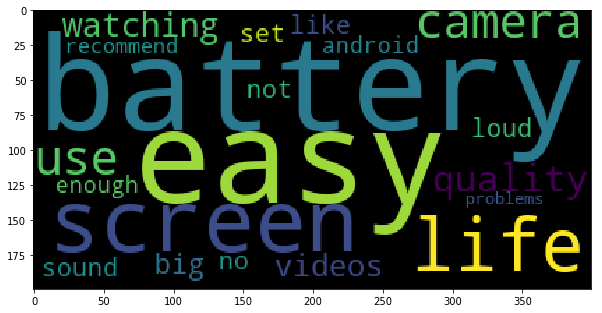

In [763]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(wc.generate_from_frequencies(word_count))

In [812]:
def wordcloud(data):
    data1=data['Review_cleaned2'].astype('str')
    tokenize_pattern = "[A-Za-z-']+"
    tokenizer = nltk.tokenize.RegexpTokenizer(pattern=tokenize_pattern)
    reviews_tokens = [tokenizer.tokenize(rev.lower()) for rev in data1]
    for rev in reviews_tokens:
        for w in stop_words:
            while True:
                try:
                    rev.remove(w)
                except:
                    break
    rev_token_all = [w for rev in reviews_tokens for w in rev]                
    word_count = Counter(rev_token_all)
    def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
        h = int(360.0 * 140.0 / 255.0)
        s = int(100.0 * 255.0 / 255.0)
        l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

        return "hsl({}, {}%, {}%)".format(h, s, l)
    wc = WordCloud(max_words=20,background_color='white',color_func=random_color_func)
    plt.figure(figsize=(8,4),edgecolor='white')
    return plt.imshow(wc.generate_from_frequencies(word_count))


In [807]:
wc_df_nokiabudget=pd.read_excel('LogisticReg_Pred_4116.xlsx',sheetname="Nokia_Budget")

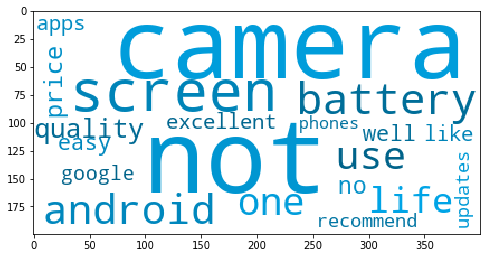

In [808]:
wordcloud(wc_df_nokiabudget)

In [734]:
wc_df_nokiabudget.shape

(197, 20)

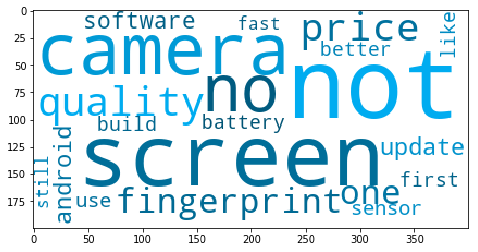

In [813]:
wc_df_premium=pd.read_excel('LogisticReg_Pred_4116.xlsx',sheetname="Nokia_premium")
wordcloud(wc_df_premium)

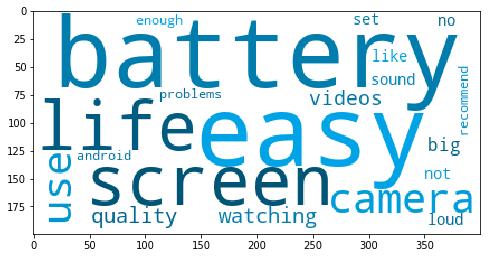

In [802]:
wordcloud(wc_df_nokiabasic)

In [ ]:
wc_df_sample.to_excel("Sample_UK_Data.xlsx")